In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  8 19:31:02 2020

@author: Lucifer
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as pl
import seaborn as sns

data=pd.read_csv('insurance.csv')


In [2]:
''' Checkig for any null values in the data and Encoding Categorical Variables'''
print(data.isnull().sum())
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker 
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

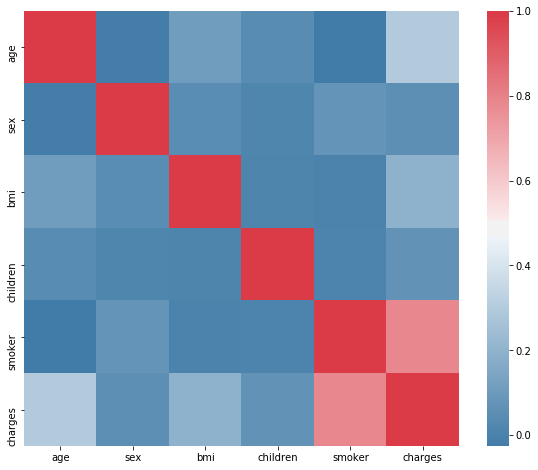

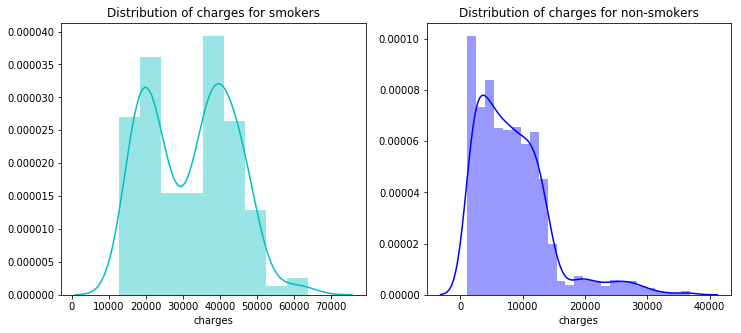

In [3]:
''' Finding Corelation between the data'''

f= pl.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(240,10,as_cmap=True),  square=True)

 

f= pl.figure(figsize=(12,5))
ax=f.add_subplot(121) # USED TO DISPLAY FIGURES ONE BY ONE
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

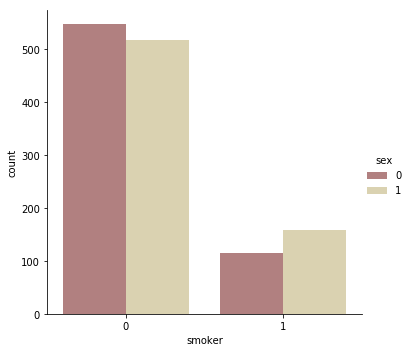

In [4]:
sns.catplot(x="smoker",kind="count",hue ='sex', palette="pink", data=data) #Run this separately

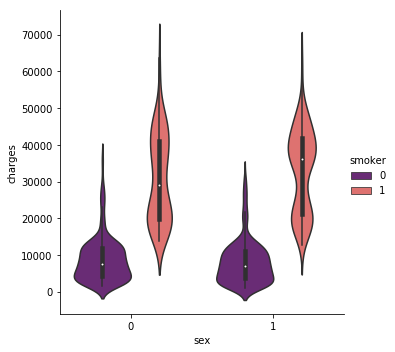

In [5]:
sns.catplot(x='sex', y="charges", hue="smoker",kind="violin", data=data, palette = 'magma') #Run this separately


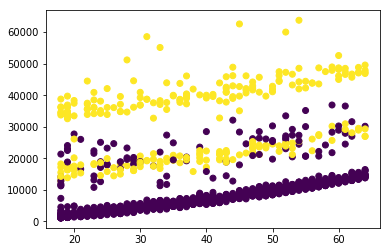

In [6]:
pl.scatter(data.age,data.charges,c=data.smoker)

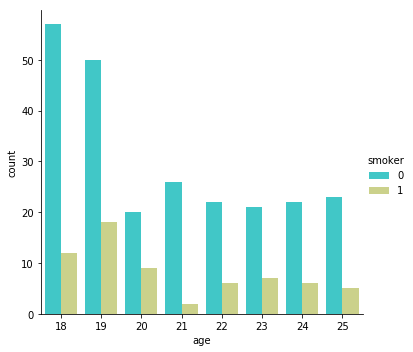

In [7]:
sns.catplot(x="age", kind="count",hue="smoker", palette="rainbow",data=data[(data.age<26)])

Text(0.5, 1.0, 'Distribution of charges for males')

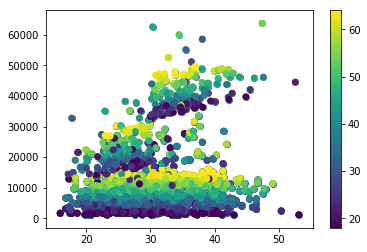

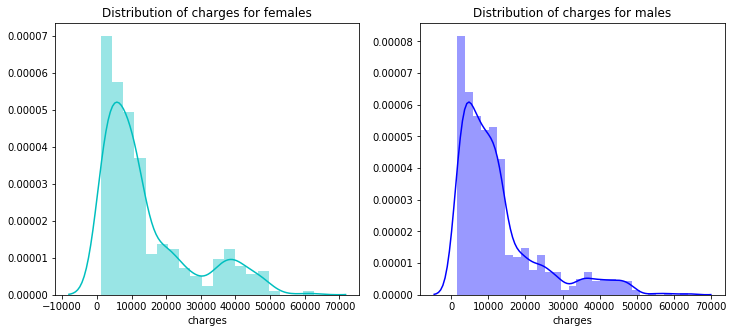

In [8]:
pl.scatter(data.bmi,data.charges)
pl.scatter(data.bmi,data.charges,c=data.smoker)

pl.scatter(data.bmi,data.charges,c=data.age)
pl.colorbar()


f= pl.figure(figsize=(12,5))
ax=f.add_subplot(121) # USED TO DISPLAY FIGURES ONE BY ONE
sns.distplot(data[(data.sex == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for females')

ax=f.add_subplot(122)
sns.distplot(data[(data.sex == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for males')
